In [1]:
pip install spacy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score

In [148]:
df=pd.read_csv('twitter_training 2.csv')

In [4]:
df.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [151]:
df.rename(columns={'im getting on borderlands and i will murder you all ,': 'Tweet content'},inplace=True)
df.rename(columns={'2401': 'Tweet ID'},inplace=True)
df.rename(columns={'Positive': 'Label'},inplace=True)

In [153]:
df

,Tweet ID,Borderlands,Label,Tweet content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [154]:
df.columns

Index(['Tweet ID', 'Borderlands', 'Label', 'Tweet content'], dtype='object')

In [155]:
df.isna().sum()

Tweet ID           0
Borderlands        0
Label              0
Tweet content    686
dtype: int64

In [156]:
df['Tweet content'].fillna(method='ffill', inplace=True)


In [157]:
df.duplicated().value_counts()

False    71655
True      3026
Name: count, dtype: int64

In [11]:
df_duplicated = df.duplicated().sum()
print(f"There are {df_duplicated} duplicate values in the dataset")

There are 3026 duplicate values in the dataset


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().value_counts()

False    71655
Name: count, dtype: int64

In [14]:
 df['Label'].value_counts()

Label
Negative      21698
Positive      19712
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

In [15]:
for i in range(5):
    print(f"{i+1}: {df['Tweet content'][i]}, {df['Label'][i]}")

1: I am coming to the borders and I will kill you all,, Positive
2: im getting on borderlands and i will kill you all,, Positive
3: im coming on borderlands and i will murder you all,, Positive
4: im getting on borderlands 2 and i will murder you me all,, Positive
5: im getting into borderlands and i can murder you all,, Positive


In [25]:
!python -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.4/12.8 MB 8.3 MB/s eta 0:00:02
     - -------------------------------------- 0.5/12.8 MB 4.0 MB/s eta 0:00:04
     ------ --------------------------------- 1.9/12.8 MB 10.3 MB/s eta 0:00:02
     ------ --------------------------------- 2.0/12.8 MB 9.2 MB/s eta 0:00:02
     -------- ------------------------------- 2.9/12.8 MB 9.6 MB/s eta 0:00:02
     ---------- ----------------------------- 3.4/12.8 MB 9.5 MB/s eta 0:00:01
     ----------- ---------------------------- 3.7/12.8 MB 8.7 MB/s eta 0:00:02
     ------------ --------------------------- 4.1/12.8 MB 8.6 MB/s eta 0:00:02
     ------------- -------------------------- 4.4/12.8 MB 8.5 MB/s eta 0:00:01
     -------------- ------------------------- 4.6/12.8 MB 8.1 MB/s eta 0:00:02
     -------------- ------------------------- 4.8/12.8 MB 7

In [26]:
nlp = spacy.load("en_core_web_sm")

In [27]:
def preprocess(Text):
    doc=nlp(Text)
    filtertoken=[]
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
            filtertoken.append(token.lemma)
            return " ".join (filtertoken)
        

In [28]:
df['Preprocessed Tweet content']=df['Tweet content'].apply(preprocess)

In [165]:
df.tail(5)

,Tweet ID,Borderlands,Label,Tweet content
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...
74680,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [158]:
df.Label.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

<Axes: xlabel='Label', ylabel='Count'>

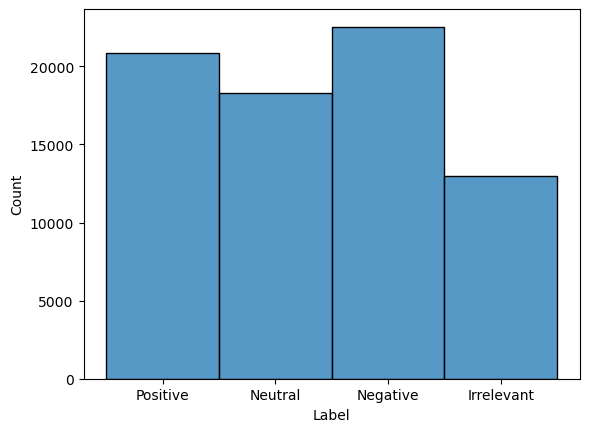

In [164]:
sns.histplot(x='Label',data=df)

<BarContainer object of 74681 artists>

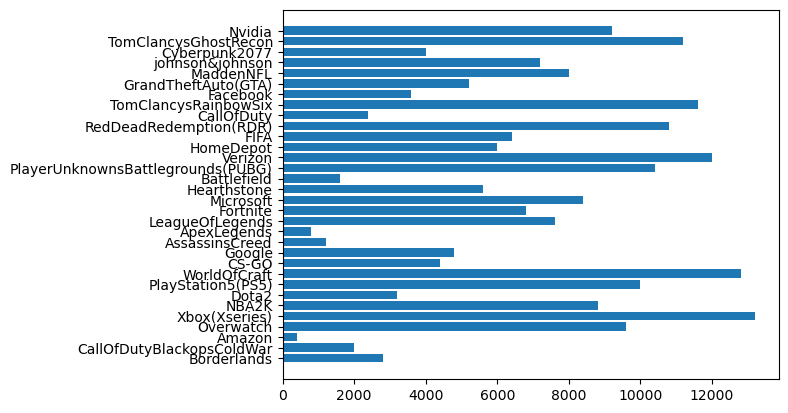

In [181]:
plt.barh(df['Borderlands'],df['Tweet ID'])

In [182]:
le=LabelEncoder()
df['Label']=le.fit_transform(df['Label'])

In [146]:
df.head(3)

,Tweet ID,Borderlands,Label,Tweet content,Preprocessed Tweet content
0,2401,Borderlands,3,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
1,2401,Borderlands,3,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
2,2401,Borderlands,3,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...


In [104]:
from sklearn.model_selection import train_test_split

In [105]:
x_train, x_test, y_train, y_test = train_test_split(df['Preprocessed Tweet content'], df['Label'], 
                                                    test_size=0.30, random_state=42, stratify=df['Label'])

In [106]:
clf=Pipeline([
    ('victorizor',TfidfVectorizer()),
    ('naive bayes',MultinomialNB())
])

In [107]:
clf.fit(x_train,y_train)

Pipeline(steps=[('victorizor', TfidfVectorizer()),
                ('naive bayes', MultinomialNB())])

In [108]:
y_pred=clf.predict(x_test)

In [109]:
print(accuracy_score(y_test,y_pred))

0.7055868260687538


In [110]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.37      0.53      3761
           1       0.62      0.91      0.74      6510
           2       0.85      0.59      0.70      5312
           3       0.70      0.79      0.74      5914

    accuracy                           0.71     21497
   macro avg       0.78      0.67      0.68     21497
weighted avg       0.76      0.71      0.69     21497



In [111]:
clf=Pipeline([
    ("victorizor",TfidfVectorizer()),
    ('Random forest',RandomForestClassifier())
])

In [112]:
clf.fit(x_train,y_train)

Pipeline(steps=[('victorizor', TfidfVectorizer()),
                ('Random forest', RandomForestClassifier())])

In [113]:
y_pred=clf.predict(x_test)

In [114]:
print(accuracy_score(y_test,y_pred))

0.9063125087221473


In [115]:
print(classification_report
     (y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      3761
           1       0.90      0.94      0.92      6510
           2       0.91      0.90      0.91      5312
           3       0.88      0.93      0.90      5914

    accuracy                           0.91     21497
   macro avg       0.91      0.90      0.90     21497
weighted avg       0.91      0.91      0.91     21497

